In [18]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [47]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [71]:
train_set=train.flow_from_directory('/content/drive/MyDrive/tien',target_size = (200,200),batch_size = 10,class_mode = 'categorical')


Found 22 images belonging to 11 classes.


In [72]:
train_set.class_indices


{'1000 đồng': 0,
 '10000 đồng': 1,
 '100000 đồng': 2,
 '200 đồng': 3,
 '2000 đồng': 4,
 '20000 đồng': 5,
 '200000 đồng': 6,
 '500 đồng': 7,
 '5000 đồng': 8,
 '50000 đồng': 9,
 '500000 đồng': 10}

In [74]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(252,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 25, 25, 128)    

In [77]:
history = model.fit(train_set,batch_size=32,epochs=10,verbose=1)


Epoch 1/10
3/3 [==============================] - 0s 91ms/step - loss: 1.6677 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 82ms/step - loss: 1.3560 - accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 138ms/step - loss: 1.2389 - accuracy: 0.5455
Epoch 4/10
3/3 [==============================] - 0s 77ms/step - loss: 1.2003 - accuracy: 0.5455
Epoch 5/10
3/3 [==============================] - 0s 92ms/step - loss: 1.2630 - accuracy: 0.4545
Epoch 6/10
3/3 [==============================] - 0s 142ms/step - loss: 1.3034 - accuracy: 0.6364
Epoch 7/10
3/3 [==============================] - 0s 140ms/step - loss: 1.1305 - accuracy: 0.6818
Epoch 8/10
3/3 [==============================] - 0s 140ms/step - loss: 1.7156 - accuracy: 0.5000
Epoch 9/10
3/3 [==============================] - 0s 137ms/step - loss: 0.9862 - accuracy: 0.5909
Epoch 10/10
3/3 [==============================] - 0s 139ms/step - loss: 1.2892 - accuracy: 0.4545


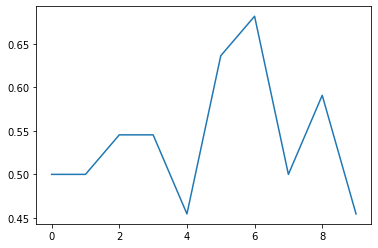

In [78]:
plt.plot(history.history['accuracy'])

In [79]:
model.save('tien.h5')

In [80]:
labels ={0:'1000 đồng',
 1:'10000 đồng',
 2:'100000 đồng',
 3:'200 đồng',
 4:'2000 đồng',
 5:'20000 đồng',
 6:'200000 đồng',
 7:'500 đồng',
 8:'5000 đồng',
 9:'50000 đồng',
 10:'500000 đồng'}

In [81]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
from keras.preprocessing.image import load_img,img_to_array
model= load_model('tien.h5')

kết quả dự đoán


'10000 đồng'

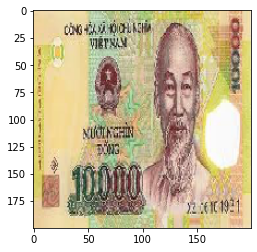

In [82]:
img= load_img('131111hinh-mat-truoc-tien-polyme-viet-nam-10000-dong.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,200,200,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]

kết quả dự đoán


'50000 đồng'

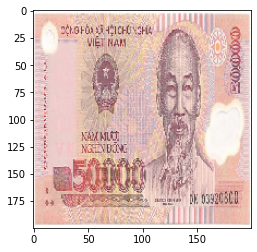

In [83]:
img= load_img('vn-p121a-f.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,200,200,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]

kết quả dự đoán


'500000 đồng'

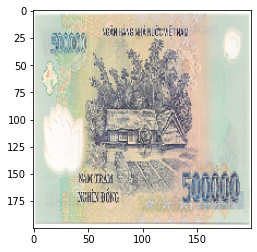

In [84]:
img= load_img('vn-p124a-b.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,200,200,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]